In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import dataKey

In [3]:
dataKey.retrieve_all_questions()

IndexError: single positional indexer is out-of-bounds

In [65]:
def create_result_histogram(field_name):
    df = pd.read_csv("processed_data.csv")
    try:
        question, answers = dataKey.retrieve_question_data(field_name)
    except Exception:
        question = field_name
    df[field_name].value_counts().plot.hist()
    plt.suptitle(question)

In [59]:
def create_result_bar(field_name):
    df = pd.read_csv("processed_data.csv")
    question, answers = dataKey.retrieve_question_data(field_name)
    print("Question:",question)
    for i in answers.keys():
        print(i+": "+answers[i])
    df[field_name] = df[field_name].apply(lambda x: answers[str(x)])
    df[field_name].value_counts().plot.bar()
    plt.suptitle(field_name)

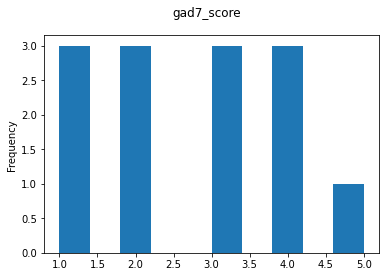

In [60]:
create_result_histogram("gad7_score")

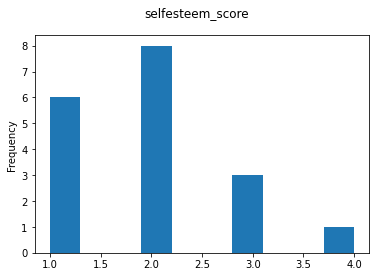

In [61]:
create_result_histogram("selfesteem_score")

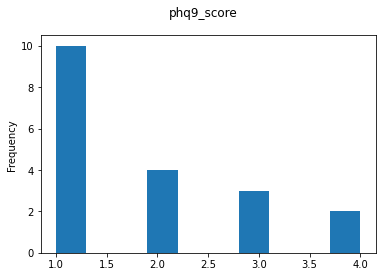

In [62]:
create_result_histogram("phq9_score")

Question: Have you or anyone in your immediate family, close friends, or significant other lost a job due to the COVID-19 pandemic? Or their employment have been negatively affected due to the COVID-19 pandemic?
1: Yes
2: No
3: I'm not sure


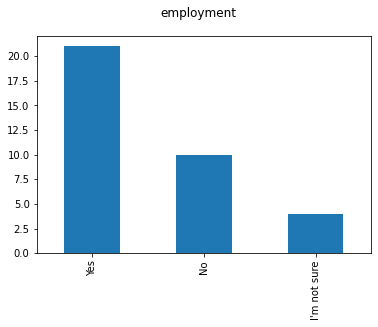

In [63]:
create_result_bar("employment")

In [ ]:
create_result_bar("employment")